# Figure 2: Extensive sampling of Streptococcus pneumoniae carriage worldwide showcases the unique genetic composition in different geographic populations

We have performed a pangenome analyses adding one population at a time, with the following populations:

- Navajo + 9 reference genomes (946 genomes)
- Navajo + SPARC1 + 9 reference genomes (1562 genomes)
- Navajo + SPARC1 + SPARC2 + 9 reference genomes (2293 genomes)
- Navajo + SPARC1 + SPARC2 + Soton + 9 reference genomes (2763 genomes)
- Navajo + SPARC1 + SPARC2 + Soton + Maela + 9 reference genomes (5683 genomes)
- Navajo + SPARC1 + SPARC2 + Soton + Maela + Malawi + 9 reference genomes (6312 genomes)
- Navajo + SPARC1 + SPARC2 + Soton + Maela + Malawi + SA + 9 reference genomes (7949 genomes)
- Navajo + SPARC1 + SPARC2 + Soton + Maela + Malawi + SA + Iceland + 9 reference genomes (8907 genomes)

### Import necessary packages

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import seaborn as sns
import matplotlib.patches as patches
import colorsys

### Figure 2B: Pie chart with sample proportion breakdown for worldwide datasets

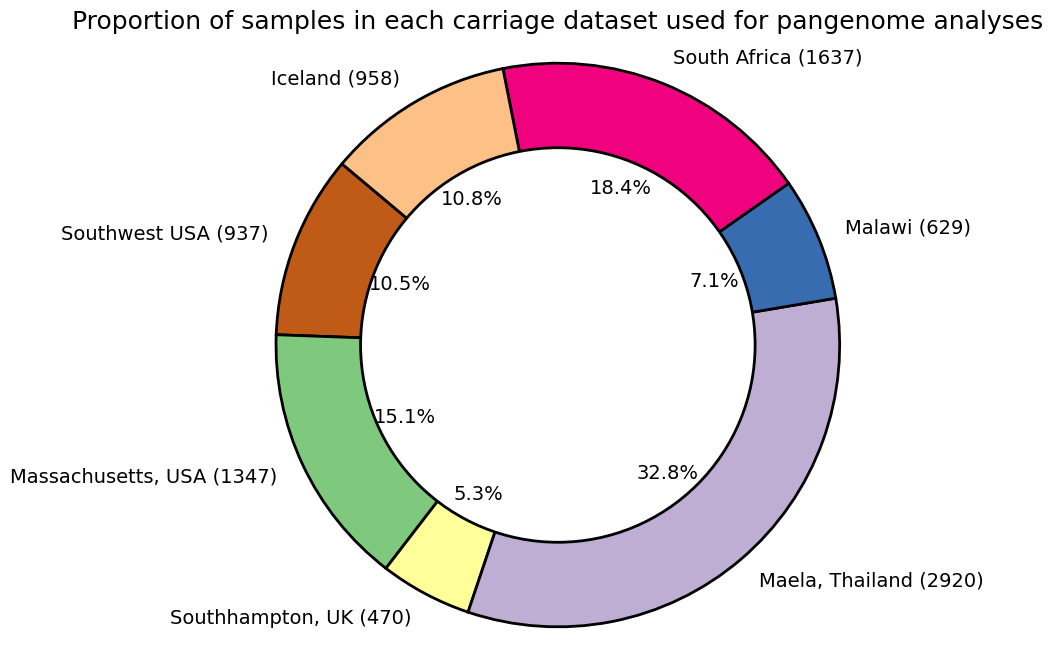

In [38]:
# Data to plot
labels = ['Southwest USA (937)', 'Massachusetts, USA (1347)', 'Southhampton, UK (470)', 'Maela, Thailand (2920)', 'Malawi (629)', 'South Africa (1637)', 'Iceland (958)']
sizes = [937, 1347, 470, 2920, 629, 1637, 958] # This is the number of samples in each dataset
colors = ['#bf5b17', '#7fc97f', '#ffff99', '#beaed4', '#386cb0', '#f0027f', '#fdc086'] # Each population is tagged with a specific color

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14}, wedgeprops={'edgecolor': 'black', 'linewidth': 2}) 

center_circle = plt.Circle((0,0),0.70,fc='white', edgecolor='black', linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')  

plt.title('Proportion of samples in each carriage dataset used for pangenome analyses', fontsize=18)
plt.show()

# Save the figure as SVG in a specified location
#output_file = '/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/Figure1/individual_figures/piechart_samples_location.svg'  
#plt.savefig(output_file, format='svg')

## Figure 2C: Distribution of most prevalent global pneumococcal sequence clusters in the different populations

In [45]:
# Import data

# Southwest US
navajo_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/navajo/poppunk_typing_external_clusters.csv')
navajo_gpsc['Dataset'] = 'Southwest USA'

# Mass SPARC1
sparc1_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/sparc1/poppunk_typing_external_clusters.csv')
sparc1_gpsc['Dataset'] = 'Massachusetts, USA'

# Mass SPARC2
sparc2_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/sparc2/poppunk_typing_external_clusters.csv')
sparc2_gpsc['Dataset'] = 'Massachusetts, USA'

# Soton
soton_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/soton/poppunk_typing_external_clusters.csv')
soton_gpsc['Dataset'] = 'Southampton, UK'

# Maela
maela_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/maela/poppunk_typing_external_clusters.csv')
maela_gpsc['Dataset'] = 'Maela, Thailand'

# Malawi
malawi_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/malawi/poppunk_typing_external_clusters.csv')
malawi_gpsc['Dataset'] = 'Malawi'

# South Africa
sa_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/south_africa/poppunk_typing_external_clusters.csv')
sa_gpsc['Dataset'] = 'South Africa'

# Iceland
iceland_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/iceland/poppunk_typing_external_clusters.csv')
iceland_gpsc['Dataset'] = 'Iceland'

# Closed references
closedrefs_gpsc = pd.read_csv('/Users/indragonzalez/Dropbox/Lipsitch_Rotation/NFDS/Scripts/clean_projects/CLARC/writing/paper/Figures/v3_order/Figure2/data/poppunk_typing/closed_refs/poppunk_typing_external_clusters.csv')
closedrefs_gpsc['Dataset'] = 'Closed references'

In [46]:
# Join dataframes into one
gpsc_dfs = [navajo_gpsc, sparc1_gpsc, sparc2_gpsc, soton_gpsc, maela_gpsc, malawi_gpsc, sa_gpsc, iceland_gpsc]
all_gpsc = pd.concat(gpsc_dfs, ignore_index=True)

In [47]:
# Sometimes PopPUNK offers a main cluster and a subcluster. In the results they look like cluster;subcluster. For those, we need to only extract the cluster. 

for row in all_gpsc.iterrows():
    
    index = row[0]
    gpsc_value = row[1]['GPSC']

    if ';' in str(gpsc_value):
        new_gpsc = str(gpsc_value).split(';')[0]
        all_gpsc.at[index, 'GPSC'] = new_gpsc

In [48]:
# Turn GPSC values into strings so that the subsequent grouping works correctly
all_gpsc['GPSC'] = all_gpsc['GPSC'].astype(str)

#### Heatmap with GPSC frequencies

In [49]:
# Calculate GPSC frequency per dataset
freq_df = all_gpsc.groupby(['Dataset', 'GPSC']).size().unstack(fill_value=0)
total_samples_per_dataset = freq_df.sum(axis=1)
normalized_freq_df = freq_df.div(total_samples_per_dataset, axis=0)

In [53]:
# Sort GPSC columns by highest overall frequency across all datasets
# Select top 40 most frequent GPSCs to visualize in the heatmap
column_totals = normalized_freq_df.sum(axis=0)
sorted_columns = column_totals.sort_values(ascending=False).index
normalized_freq_df = normalized_freq_df[sorted_columns]
topn = 40
normalized_freq_df_topn = normalized_freq_df.iloc[:, :topn]

# Change row order based on approximate dataset geographic proximity 
row_order = ['Southwest USA', 'Massachusetts, USA', 'Southampton, UK','Maela, Thailand', 'Malawi', 'South Africa', 'Iceland']
normalized_freq_df_topn = normalized_freq_df_topn.reindex(row_order)

In [54]:
normalized_freq_df_topn

GPSC,4,7,3,1,24,5,11,19,36,13,...,37,39,57,18,23,17,34,16,76,61
Dataset,,,,,,,,,,,,,,,,,,,,,
Southwest USA,0.089648,0.080043,0.048026,0.012807,0.000000,0.037353,0.034152,0.043757,0.024546,0.028815,...,0.000000,0.013874,0.023479,0.020277,0.028815,0.000000,0.000000,0.006403,0.002134,0.022412
"Massachusetts, USA",0.131403,0.080921,0.095026,0.052710,0.013363,0.046771,0.009651,0.040089,0.051967,0.022272,...,0.000000,0.005197,0.005939,0.014105,0.005197,0.000000,0.000000,0.011878,0.001485,0.000742
"Southampton, UK",0.102128,0.119149,0.093617,0.000000,0.091489,0.006383,0.059574,0.036170,0.053191,0.008511,...,0.000000,0.010638,0.008511,0.014894,0.002128,0.000000,0.000000,0.012766,0.000000,0.006383
"Maela, Thailand",0.000000,0.000000,0.000000,0.121233,0.011301,0.013356,0.000000,0.000000,0.000000,0.000000,...,0.024315,0.000000,0.003425,0.000342,0.010616,0.000000,0.003082,0.009932,0.000000,0.000000
Malawi,0.000000,0.000000,0.000000,0.000000,0.000000,0.030207,0.025437,0.000000,0.000000,0.034976,...,0.000000,0.000000,0.004769,0.000000,0.000000,0.006359,0.009539,0.000000,0.000000,0.009539
South Africa,0.003054,0.007330,0.012217,0.024435,0.000000,0.050092,0.016494,0.000000,0.000611,0.038485,...,0.037874,0.000000,0.011607,0.001833,0.001222,0.050703,0.043983,0.000611,0.000000,0.009774
Iceland,0.113779,0.130480,0.075157,0.054280,0.089770,0.002088,0.038622,0.033403,0.016701,0.001044,...,0.000000,0.031315,0.001044,0.006263,0.009395,0.000000,0.000000,0.010438,0.046973,0.000000


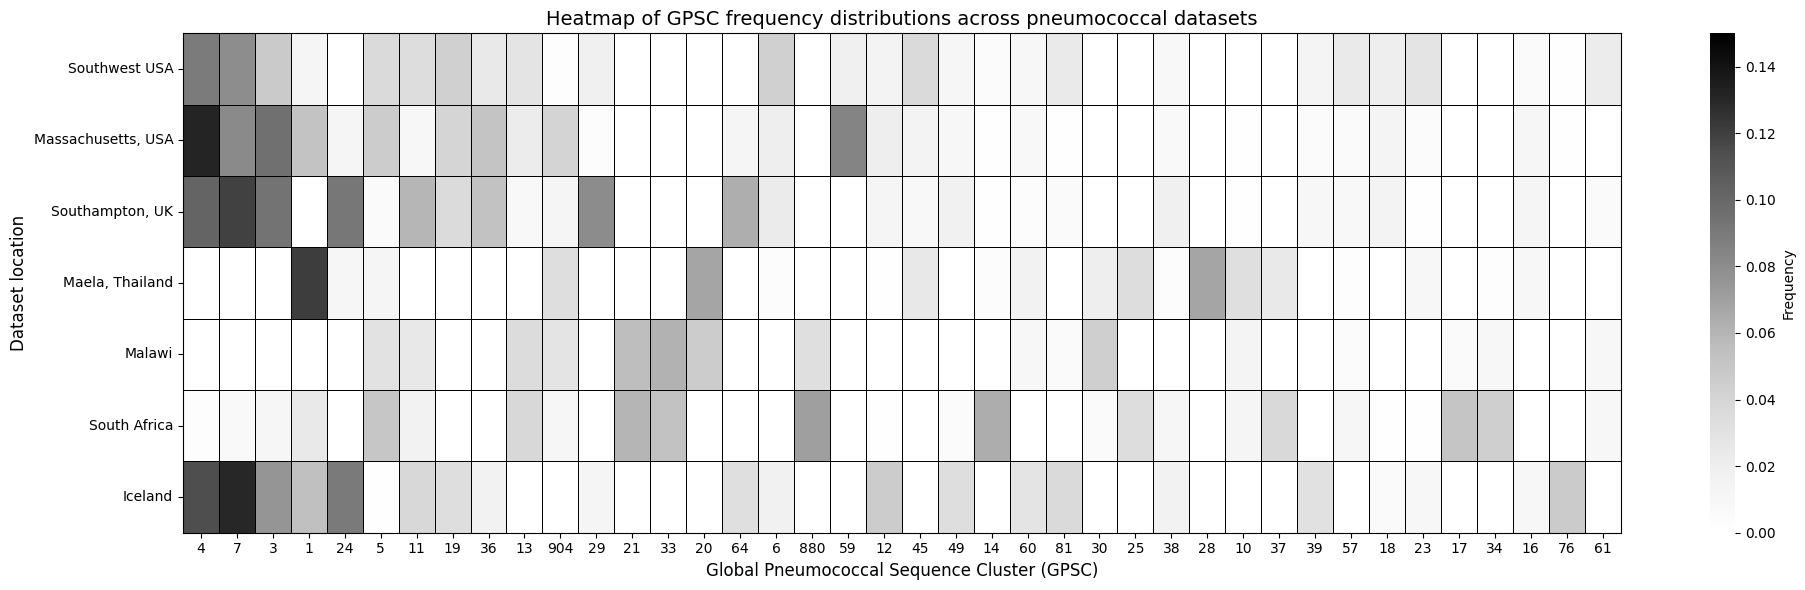

In [65]:
# Plot heatmap to illustrate different GPSC distributions across the datasets

plt.figure(figsize=(20, 6))
ax = sns.heatmap(
    normalized_freq_df_topn, 
    cmap="Greys", 
    vmin=0, 
    vmax=0.15, 
    cbar_kws={'label': 'Frequency'}, 
    linecolor='black', 
    linewidths=0.5
)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')

plt.xlabel('Global Pneumococcal Sequence Cluster (GPSC)', fontsize=12)
plt.ylabel('Dataset location', fontsize=12)
plt.title('Heatmap of GPSC frequency distributions across pneumococcal datasets', fontsize=14)

plt.tight_layout()
plt.show()